### 목차

- [<Step1.> : 문제정의 및 가설설정](#<Step1.>-:-문제정의-및-가설설정)
    - [문제정의]
    - [가설설정]
- [<Step2.> : 데이터 가공(수집 및 전처리)](#<Step2.>-:-데이터-가공)
    - [데이터 불러오기]
    - [데이터 결합]
    - [데이터 결측값 제거]
    - [데이터 구조 변경]
- [<Step3.> : 데이터 모델링 및 시각화](#<Step3.>-:-데이터-모델링-및-시각화)
    - [1. 아파트 매매가에 영향을 미치는 요인]
        - [1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다 _ ([lmplot](https://seaborn.pydata.org/examples/multiple_regression.html))]
        - [1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다 _ ([heatmap](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html))]
        - [1-3. 지역구별로 아파트 매매가에 차이가 날 것이다 _ ([boxplot](https://seaborn.pydata.org/examples/grouped_boxplot.html) & [boxenplot](https://seaborn.pydata.org/examples/large_distributions.html))]
        - [1-4. 브랜드별로 아파트 매매가에 차이가 날 것이다 _ (barplot)]       
    - [2. 연도별 아파트 건물면적과 층고]
        - [2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다 _ ([pieplot](https://wikidocs.net/92114))]
        - [2-2. 건축년도가 최근일수록 층고가 높을 것이다 _ (plot)]

# <Step1.> : 문제정의 및 가설설정

## [문제정의]

 1. 아파트 매매가에 영향을 미치는 요인
 2. 연도별 아파트 건물면적과 층고
    
## [가설설정]
    
 1. 아파트 매매가에 영향을 미치는 요인
   * 1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다.
   * 1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다.
   * 1-3. 지역구별로 아파트 매매가에 차이가 날 것이다.
   * 1-4. 브랜드별로 아파트 매매가에 차이가 날 것이다.
 2. 연도별 아파트 건물면적과 층고
   * 2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다.
   * 2-2. 건축년도가 최근일수록 층고가 높을 것이다.

# <Step2.> : 데이터 가공

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### 1. 법정동코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
locCode.shape

(20556, 7)

In [5]:
# 시도명 서울특별시 외에는 삭제
locCode.drop(locCode[locCode['시도명'] != '서울특별시'].index, inplace=True)
locCode.shape

(493, 7)

In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['지역코드'] = locCode['법정동코드'] // 100000
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN,11000
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110


In [7]:
# 불필요한 컬럼 제거
loc = locCode.drop(['법정동코드', '동리명', '생성일자', '말소일자'], axis=1)
loc.head()

,시도명,시군구명,읍면동명,지역코드
0,서울특별시,NaN,NaN,11000
1,서울특별시,종로구,NaN,11110
2,서울특별시,종로구,청운동,11110
3,서울특별시,종로구,신교동,11110
4,서울특별시,종로구,궁정동,11110


In [8]:
# 구와 동에서 NaN 값 제거
loc.dropna(inplace=True)
loc.head()

,시도명,시군구명,읍면동명,지역코드
2,서울특별시,종로구,청운동,11110
3,서울특별시,종로구,신교동,11110
4,서울특별시,종로구,궁정동,11110
5,서울특별시,종로구,효자동,11110
6,서울특별시,종로구,창성동,11110


### 2. 실거래가 데이터 가공

In [9]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [10]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isna().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [11]:
apt.shape

(176001, 8)

In [12]:
# 건물주용도 컬럼 제거
apt.drop('건물주용도코드', axis=1, inplace=True)
apt.shape

(176001, 7)

In [13]:
# 건물주용도 아파트만 남기기
apt.drop(apt[apt['건물주용도'] != '아파트'].index, inplace=True)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,아파트,735000000,1971.0,강변


In [14]:
# 거래금액 억 단위로
apt['거래금액'] = apt['거래금액'] / 100000000
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,아파트,7.49,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,아파트,12.00,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,59.55,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,64.43,5.0,아파트,7.35,1971.0,강변


In [15]:
# 건물면적 평 단위로
apt['건물면적'] = round(apt['건물면적'] * 0.3025)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,18.0,5.0,아파트,7.49,0.0,래미안 장위포레카운티
1,길음동,26.0,18.0,아파트,12.00,0.0,롯데캐슬 클라시아
2,구로동,11.0,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,18.0,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,19.0,5.0,아파트,7.35,1971.0,강변


In [16]:
# 건축년도 0 -> 2000
apt['건축년도'].replace(0, 2000, inplace=True)
apt.head()

,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,18.0,5.0,아파트,7.49,2000.0,래미안 장위포레카운티
1,길음동,26.0,18.0,아파트,12.00,2000.0,롯데캐슬 클라시아
2,구로동,11.0,1.0,아파트,1.05,1994.0,궁전아트빌라
3,산천동,18.0,2.0,아파트,8.30,2001.0,리버힐삼성
4,이촌동,19.0,5.0,아파트,7.35,1971.0,강변


### 3. 데이터 프레임 결합

In [17]:
loc_apt = pd.merge(loc, apt, left_on='읍면동명', right_on='법정동명')
loc_apt

,시도명,시군구명,읍면동명,지역코드,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
0,서울특별시,종로구,청운동,11110,청운동,26.0,3.0,아파트,8.95,2000.0,청운현대
1,서울특별시,종로구,청운동,11110,청운동,26.0,3.0,아파트,8.50,2000.0,청운현대
2,서울특별시,종로구,신교동,11110,신교동,41.0,5.0,아파트,10.00,2002.0,신현(102동)
3,서울특별시,종로구,필운동,11110,필운동,33.0,7.0,아파트,9.40,2007.0,신동아블루아광화문의 꿈
4,서울특별시,종로구,필운동,11110,필운동,34.0,6.0,아파트,10.00,2007.0,신동아블루아광화문의 꿈
...,...,...,...,...,...,...,...,...,...,...,...
90661,서울특별시,강동구,강일동,11740,강일동,26.0,4.0,아파트,8.20,2009.0,강일리버파크6단지
90662,서울특별시,강동구,강일동,11740,강일동,26.0,10.0,아파트,7.90,2009.0,강일리버파크3단지
90663,서울특별시,강동구,강일동,11740,강일동,18.0,12.0,아파트,8.30,2009.0,강일리버파크3단지
90664,서울특별시,강동구,강일동,11740,강일동,18.0,13.0,아파트,7.60,2009.0,강일리버파크7단지


# <Step3.> : 데이터 모델링 및 시각화

## [1. 아파트 매매가에 영향을 미치는 요인]

### 1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다. _ (lmplot)

In [18]:
lss_apt = apt.pivot_table('거래금액', '건물면적').reset_index()
lss_apt

,건물면적,거래금액
0,3.0,1.399400
1,4.0,1.409988
2,5.0,1.560451
3,6.0,2.037068
4,7.0,2.281165
...,...,...
75,79.0,27.865000
76,81.0,25.000000
77,82.0,67.000000
78,83.0,60.375000


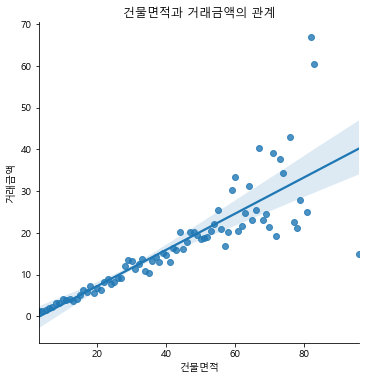

In [19]:
sns.lmplot(x='건물면적', y='거래금액', data=lss_apt)
plt.title("건물면적과 거래금액의 관계")
plt.show()

#### 분석결과  
    건물면적이 넓으면 아파트 매매가(거래금액)가 높을 것이라는 가설에 대해 확인했다.
    
    > 분석결과 : 예측한대로 건물면적이 넓으면 아파트 매매가도 높다.

### 1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다 _ (heatmap)

### 1-3. 지역구별로 아파트 매매가에 차이가 날 것이다 _ (boxplot & boxenplot)

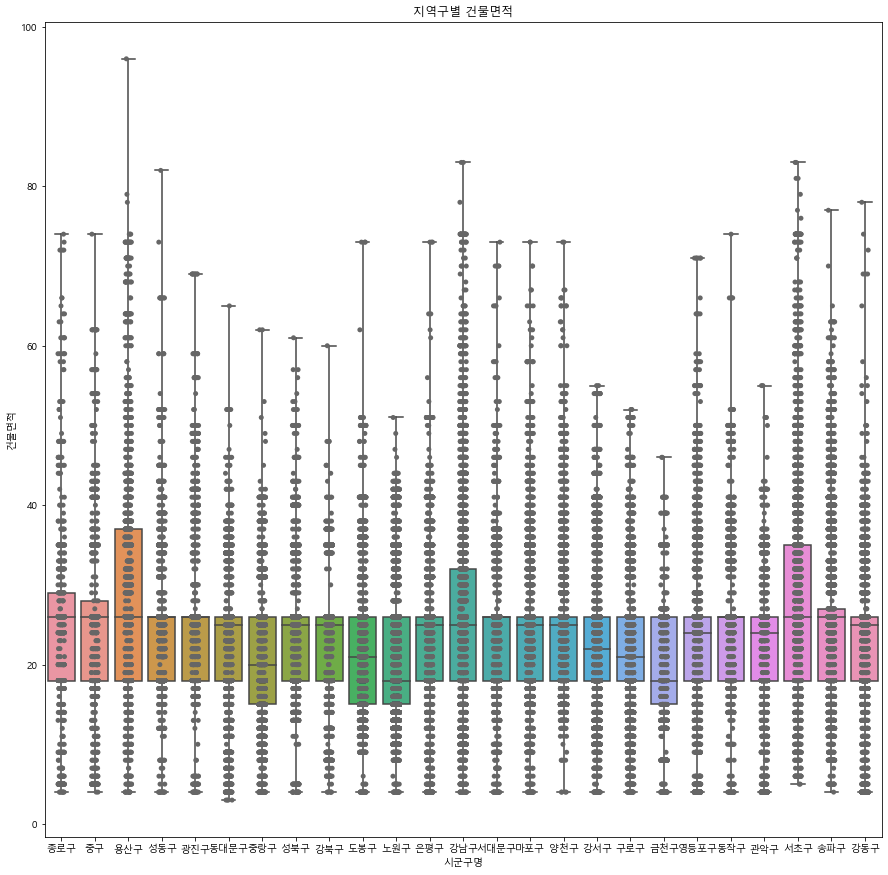

In [20]:
plt.figure(figsize=(15, 15))
plt.title('지역구별 건물면적')
sns.boxplot(x='시군구명', y='건물면적', data=loc_apt, whis=np.inf)
sns.stripplot(x='시군구명', y='건물면적', data=loc_apt, jitter=True, color="0.4")
plt.show()

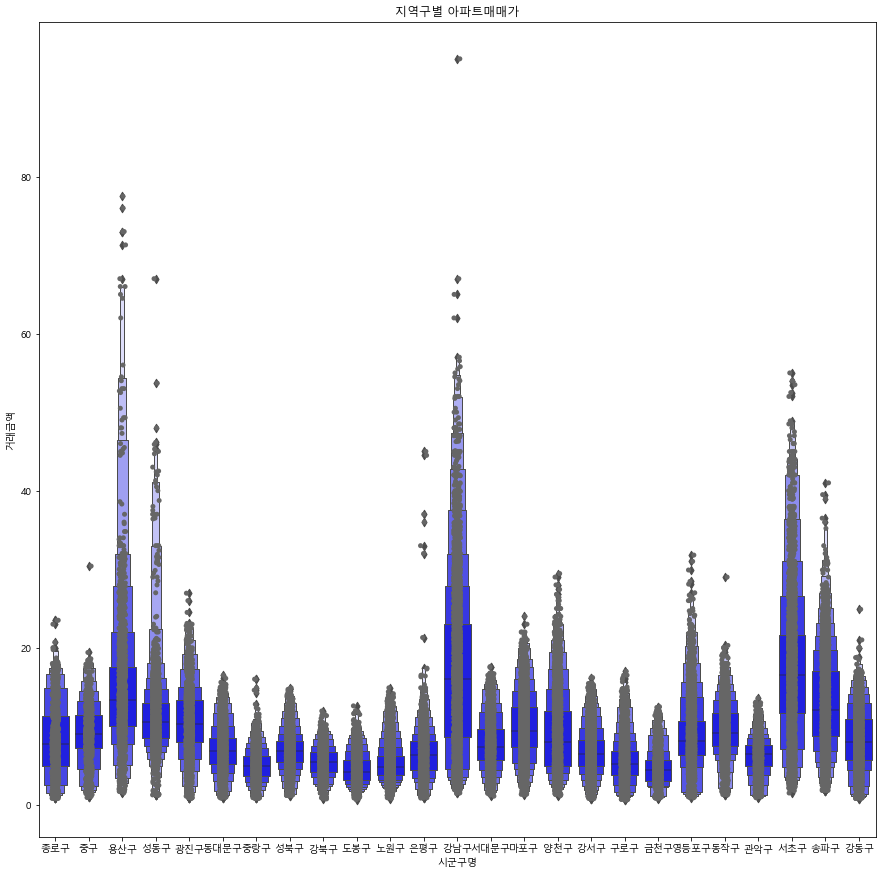

In [21]:
plt.figure(figsize=(15, 15))
plt.title('지역구별 아파트매매가')
sns.boxenplot(x="시군구명", y="거래금액",
              color="b",
              scale="linear", 
              data=loc_apt)
sns.stripplot(x='시군구명', y='거래금액', data=loc_apt, jitter=True, color="0.4")
plt.show()

In [22]:
loc_apt[loc_apt['거래금액'] > 50]

,시도명,시군구명,읍면동명,지역코드,법정동명,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명
3179,서울특별시,용산구,한남동,11170,한남동,71.0,6.0,아파트,56.00,2011.0,한남더힐
3185,서울특별시,용산구,한남동,11170,한남동,73.0,1.0,아파트,71.30,2011.0,한남더힐
3186,서울특별시,용산구,한남동,11170,한남동,73.0,3.0,아파트,62.00,2011.0,한남더힐
3220,서울특별시,용산구,한남동,11170,한남동,71.0,5.0,아파트,52.50,2011.0,한남더힐
3226,서울특별시,용산구,한남동,11170,한남동,73.0,5.0,아파트,66.00,2011.0,한남더힐
3227,서울특별시,용산구,한남동,11170,한남동,73.0,4.0,아파트,64.50,2011.0,한남더힐
3231,서울특별시,용산구,한남동,11170,한남동,73.0,-1.0,아파트,73.00,2011.0,한남더힐
3238,서울특별시,용산구,한남동,11170,한남동,71.0,8.0,아파트,53.00,2011.0,한남더힐
3252,서울특별시,용산구,한남동,11170,한남동,73.0,2.0,아파트,67.00,2011.0,한남더힐
3258,서울특별시,용산구,한남동,11170,한남동,71.0,6.0,아파트,52.70,2011.0,한남더힐


#### 분석결과  
    분명 지역구별로 아파트 매매가에 차이가 있는 것은 맞으나
    지역구 단위보다 더 세세하게 나눠야 할 필요가 있었다.
    
    > 분석결과 : 지역구별 아파트 매매가의 차이를 확인했다. barplot으로 봤을 때의 이상치는 아래와 같은 이유가 있었다.
      - 희소성이 강한 조망권 프리미엄의 이유로 서울에서 최고가에 거래된 아파트의 대부분이 한강변에 몰려있다.(서초구)
      - 강남은 기존의 입지와 학군지 진입 수요차이가 가장 높아 거래 가격이 높다.
      - 그 뒤로 용산구와 종로구는 서울의 중심과 같아서 어디로든 왕래가 편하고 유동인구가 많아 거래가격이 높다.
      - 서울 중심에 비해 외곽의 거래가는 상대적으로 낮음을 알 수 있다.

### 1-4. 브랜드별로 아파트 매매가에 차이가 날 것이다 _ (barplot)

[1-1. 건물면적이 넓을수록 아파트 매매가도 높을 것이다 _ (scatter)]
[1-2. 건축년도별로 아파트 매매가에 차이가 날 것이다 _ (heatmap)]
[1-3. 지역구별로 아파트 매매가에 차이가 날 것이다 _ (boxplot & boxenplot)]
[1-4. 브랜드별로 아파트 매매가에 차이가 날 것이다 _ (barplot)]
[2. 연도별 아파트 건물면적과 층고]
[2-1. 건축년도가 최근일수록 건물면적이 좁을 것이다 _ (pieplot)]
[2-2. 건축년도가 최근일수록 층고가 높을 것이다 _ (plot)]

In [23]:
loc_apt['아파트명'].unique()

array(['청운현대', '신현(102동)', '신동아블루아광화문의 꿈', ..., '고덕리엔파크2단지', '강일리버파크4단지',
       '강일리버파크1단지'], dtype=object)

In [24]:
loc_apt['아파트명'].shape

(90666,)

In [25]:
loc_apt['아파트명'].unique().shape

(5836,)

In [26]:
# 아파트 브랜드별 아파트수 랭킹
most = pd.Series(' '.join(loc_apt['아파트명']).split()).value_counts()
most_apt = pd.DataFrame(most)
most_apt = most_apt.rename({0: '아파트수'}, axis=1)
most_apt.head(20)

,아파트수
현대,875
한신,756
두산,642
래미안,548
삼성래미안,538
벽산,518
신동아,507
롯데캐슬,478
은평뉴타운,475
주공2,438


In [27]:
# 아파트별 평균 거래금액
price_apt = loc_apt.pivot_table('거래금액',index='아파트명')
price_apt

,거래금액
아파트명,
(1101-1),1.184625
(185-5),9.516667
(23-42),2.500000
(246-11),5.700000
(323-4),6.200000
...,...
힐탑아파트3차(894-3),3.620000
힐탑트레져1동,30.900000
힐튼빌리지1차,6.300000


In [28]:
# top 20 아파트 평균 거래금액
price_most_apt = pd.concat([most_apt,price_apt],axis=1)
df_apt = price_most_apt.dropna().head(20)
df_apt
# 서울시에서 가장 많은 아파트 브랜드는 '현대'아파트라는 것을 확인할 수 있다. 

,아파트수,거래금액
현대,875.0,7.630777
한신,756.0,5.904673
두산,642.0,6.967447
삼성래미안,538.0,10.063290
벽산,518.0,5.752733
신동아,507.0,9.541181
롯데캐슬,478.0,9.435295
주공2,438.0,4.031747
에스케이북한산시티,411.0,5.941509
힐스테이트,384.0,16.124091


In [29]:
df_apt.index

Index(['현대', '한신', '두산', '삼성래미안', '벽산', '신동아', '롯데캐슬', '주공2', '에스케이북한산시티',
       '힐스테이트', '삼성', '대우', '극동', '우성', '쌍용', '동아', '신동아아파트1', '파크리오', '중앙하이츠',
       '현대1'],
      dtype='object')

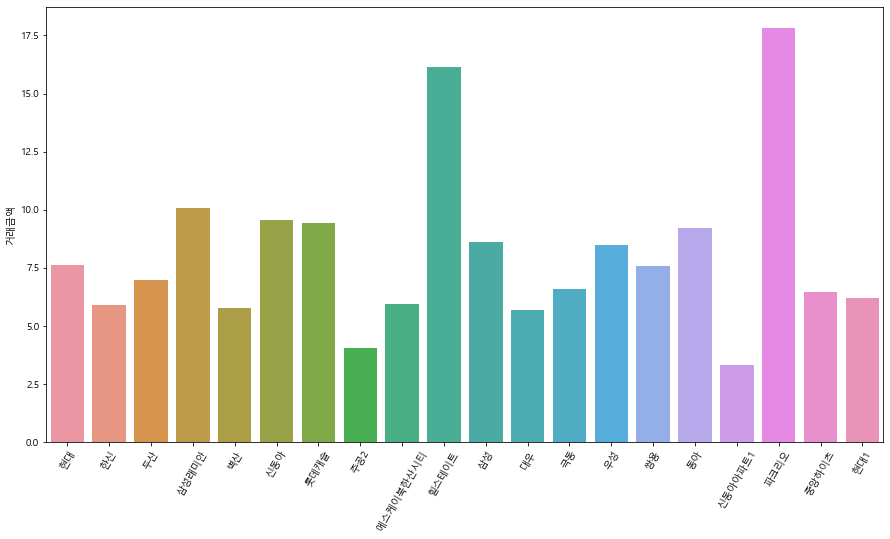

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df_apt.index, y=df_apt['거래금액'])
plt.xticks(rotation=60)
plt.show()
# 서울시에 가장 많은 아파트 브랜드 20개 중 가장 비싼 아파트는 '파크리오'이고, 가장 저렴한 아파트는 '신동아아파트1'이라는 것을 확인할 수 있다.
# 고가 브랜드 일수록 아파트 거래금액이 더 비싸다는 것을 알 수 있다.

In [34]:
loc_apt.groupby('시군구명')['아파트명'].count().sort_values()

시군구명
종로구      793
중구      1100
광진구     1320
용산구     1577
금천구     1721
강북구     2282
관악구     2822
중랑구     2942
동작구     3033
서대문구    3036
성동구     3239
서초구     3329
동대문구    3357
은평구     3744
양천구     3819
영등포구    3836
강남구     4408
강동구     4582
도봉구     4619
성북구     4696
마포구     4705
송파구     5048
구로구     5172
강서구     6082
노원구     9404
Name: 아파트명, dtype: int64